Article: https://aihorizonforecast.substack.com/p/forecasting-with-nhits-uniting-deep?utm_source=post-email-title&publication_id=1940355&post_id=149537006&utm_campaign=email-post-title&isFreemail=true&r=46i495&triedRedirect=true&utm_medium=email

In [15]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(40)

#### Multi-Rate Data Sampling

In [40]:
# 1. Create a 1D input tensor
simulated_data = np.random.randn(100)
input_tensor = torch.tensor(simulated_data).unsqueeze(0)
print(f'Input Tensor shape: {input_tensor.shape}')

Input Tensor shape: torch.Size([1, 100])


In [41]:
# 2. Apply MaxPool1D with padding, then convert tensors to numpy
output_tensor_k2 = nn.functional.max_pool1d(input_tensor, 
    kernel_size=2,
    stride=2,
    ceil_mode=True)
output_tensor_k4 = nn.functional.max_pool1d(input_tensor,
    kernel_size=4,
    stride=2,
    ceil_mode=True)
input_tensor = input_tensor.squeeze(0).numpy()
output_tensor_k2 = output_tensor_k2.squeeze(0).numpy()
output_tensor_k4 = output_tensor_k4.squeeze(0).numpy()

print(f'Output Tensor k=2 shape: {output_tensor_k2.shape}')
print(f'Output Tensor k=4 shape: {output_tensor_k4.shape}')


Output Tensor k=2 shape: (50,)
Output Tensor k=4 shape: (49,)


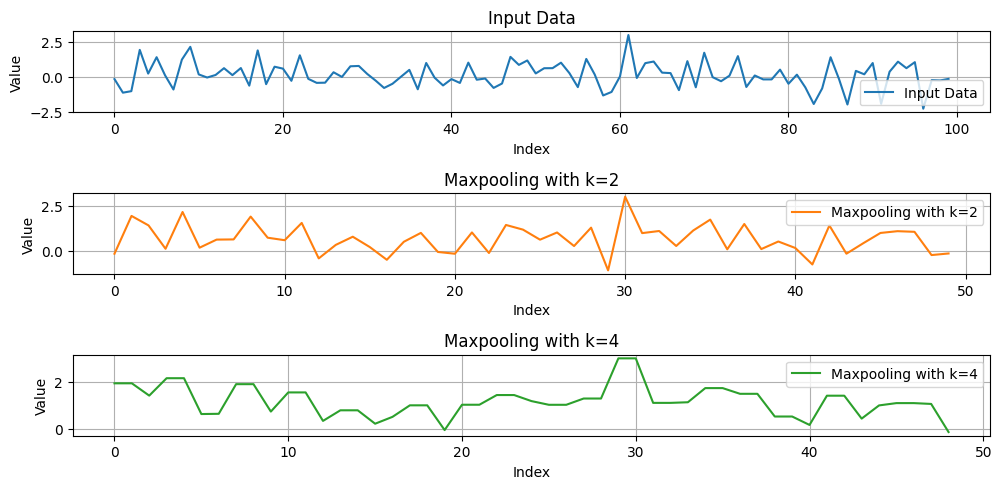

In [42]:
# Plot data
tensors = [(input_tensor, '#1f77b4', 'Input Data'), 
           (output_tensor_k2, '#ff7f0e', 'Maxpooling with k=2'), 
           (output_tensor_k4, '#2ca02c', 'Maxpooling with k=4')]

plt.figure(figsize=(10, 5))

for i, (tensor, color, label) in enumerate(tensors, 1):
    plt.subplot(3, 1, i)
    plt.plot(tensor, color=color, label=label)
    plt.title(label)
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

The previous analysis ilustrates how blocks with different pooling "agression" focus on different aspects. Blocks with bigger kernels focus on higher frequencias specializing in long-term forecasting. In contrast, blocks with smaller kernel sizes learn short-term cyclical patterns.

#### Neural Basis Expansion
Simply put, this model can learn polynomial functions to model non-linear behaviors.
A polynomial function can closely approximate any non-linear bejaviors.
A polynomial function can closely approximate any non-linear curve by adding more terms to the polynomial (known as polynomial basis expansion)

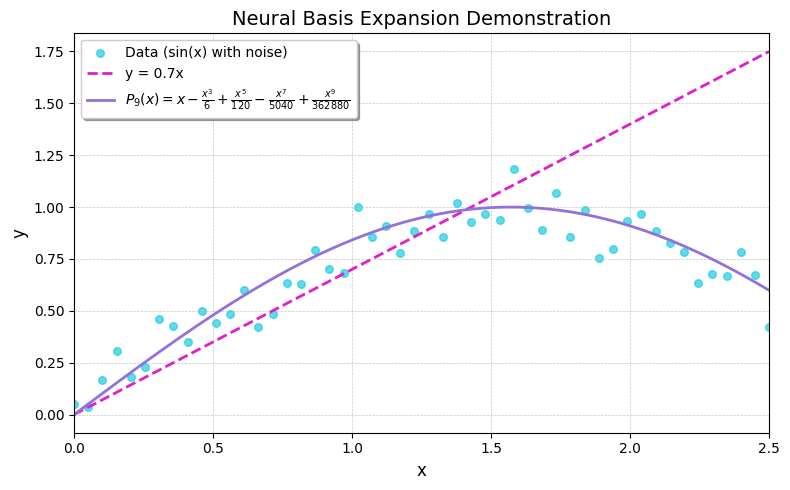

In [44]:
# Example
np.random.seed(42)
x_data = np.linspace(0, 2.5, 50) # x-values from 0 to 2.5
y_data = np.sin(x_data) + np.random.normal(0, 0.1, size=x_data.shape) # sin(x) with random noise.

def P9(x):
    return x - (x**3)/6 + (x**5)/120 - (x**7)/5040 + (x**9)/362880

plt.figure(figsize=(8, 5), dpi=100)
colors = {
    "data": "#1ECBE1",     
    "linear": "#E11ECB",   
    "polynomial": "#9370DB" 
}

plt.scatter(x_data, y_data, label="Data (sin(x) with noise)", color=colors['data'], s=30, alpha=0.7, )

# Plot the linear function y = 0.7x
x_lin = np.linspace(0, 2.5, 500)
y_lin = 0.7 * x_lin
plt.plot(x_lin, y_lin, label="y = 0.7x", color=colors['linear'], linestyle='--', linewidth=2)

# Plot the 9th degree polynomial approximation of sin(x)
y_P9 = P9(x_lin)
P9_equation = r"$P_9(x) = x - \frac{x^3}{6} + \frac{x^5}{120} - \frac{x^7}{5040} + \frac{x^9}{362880}$"
plt.plot(x_lin, y_P9, label=P9_equation, color=colors['polynomial'], linestyle='-', linewidth=2)

plt.title("Neural Basis Expansion Demonstration", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.xlim(0, 2.5)

plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(fontsize=10, shadow=True)
plt.tight_layout()
plt.show()

#### Doubly Residual Stacking